In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dtype_list = {'event_id':np.int16, 'ref_type':'category', 'ref_hash':np.int64, 'aplication_id':np.int16, 'atributed':bool, \
              'device_countrycode':'category', 'device_os_version':np.float64, 'device_brand':np.float64, 'device_model':np.float64,\
              'device_city':np.float64, 'session_user_agent':np.float64, 'trans_id':'category', 'user_agent':np.float64, \
              'event_uuid':object, 'carrier':np.float64, 'kind':np.float64, 'device_os':'category', 'wifi':object, 'connection_type':'category',\
              'ip_address':np.int64, 'device_language':np.float64, 'connection_type':'category'}

events = pd.read_csv('data/train_events.csv.gzip', dtype=dtype_list, parse_dates= ['date'])

In [3]:
len(events)

2494423

In [6]:
events.head().T

,0,1,2,3,4
date,2019-03-05 00:09:36.966000,2019-03-05 00:09:38.920000,2019-03-05 00:09:26.195000,2019-03-05 00:09:31.107000,2019-03-09 21:00:36.585000
event_id,0,1,0,2,3
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343
ref_hash,2688759737656491380,2688759737656491380,2688759737656491380,2688759737656491380,2635154697734164782
application_id,38,38,38,38,38
attributed,False,False,False,False,False
device_countrycode,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
device_os_version,5.9087e+17,5.9087e+17,5.9087e+17,5.9087e+17,7.39184e+18
device_brand,NaN,NaN,NaN,NaN,NaN
device_model,5.99012e+18,5.99012e+18,5.99012e+18,5.99012e+18,5.9609e+18


In [7]:
events.dtypes

date                  datetime64[ns]
event_id                       int16
ref_type                    category
ref_hash                       int64
application_id                 int64
attributed                      bool
device_countrycode          category
device_os_version            float64
device_brand                 float64
device_model                 float64
device_city                  float64
session_user_agent           float64
trans_id                    category
user_agent                   float64
event_uuid                    object
carrier                      float64
kind                         float64
device_os                   category
wifi                          object
connection_type             category
ip_address                     int64
device_language              float64
dtype: object

In [8]:
events['wifi'].value_counts()

true     930902
false    447970
Name: wifi, dtype: int64

In [9]:
events['wifi'].isnull().sum()

1115551

In [3]:
events['wifi'] = (events['wifi'] == 'true')

In [11]:
events['wifi'].dtypes

dtype('bool')

In [12]:
events['device_countrycode'].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

In [13]:
events['device_countrycode'].isnull().sum()

0

In [4]:
#es un único valor para todos los eventos entonces lo guardo en una variable y borro lo columna
device_countrycode = events['device_countrycode'].unique()[0]
device_countrycode

'6333597102633388268'

In [5]:
del events['device_countrycode']

In [16]:
events['event_uuid'].value_counts()

49885c70-7c81-4bea-b99f-e0d1b3f8d828    1
1db4c45b-93bb-4359-8b40-4fe4a6a213b1    1
ba0c5636-a514-48db-9f2b-5e6da8d8eaf6    1
46964bb0-ce7e-4938-99c1-0ad1f401bc9c    1
cf462080-5bc6-4547-a294-ea38199eedd6    1
7e97457f-e613-4d5c-8e78-fd856ba2d494    1
7cf067b0-8af6-443f-9566-6a4d3e67927f    1
f0662120-0880-4c83-814b-a312f66d1883    1
5ff1408d-20aa-4ef8-9aea-f0110a660c52    1
bb1dfd1f-cd21-49b0-9e99-5f67fb7c48ed    1
b34fe959-0544-4436-b561-d54d5303656c    1
d6e9d3e6-f2a1-446b-aba1-76f17bbc08f7    1
ccc60127-2c1c-49be-ad82-3a93e6e9262b    1
c15a2d3d-f2c7-4a01-b029-bfb701d922b6    1
54e95681-ff46-44bd-b1b9-0f09f263a578    1
5265a77e-5b43-446c-abcd-b3566a31c576    1
6a93705d-85df-4714-838d-72365a30adf3    1
62c19389-0f21-47f7-8424-75808fc29cfd    1
d75d97fc-e6ca-4c9b-a12b-5b0f3358521c    1
d1117b4f-5f95-4936-bcdf-d2785abefa60    1
f0a88cfa-3515-4d9b-b358-1350912688a2    1
280ba615-02e1-4378-9260-2f74713b27bf    1
2a3c024f-0bac-4338-b020-9a140c137b2d    1
a2874394-ef4e-468a-bca6-3b62c30129

In [6]:
#son todos valores diferentes, no me dice nada, borro la columna
del events['event_uuid']

In [7]:
events['hour'] = events['date'].dt.hour

In [8]:
events['day'] = events['date'].dt.day

# *Top 10 ciudades*

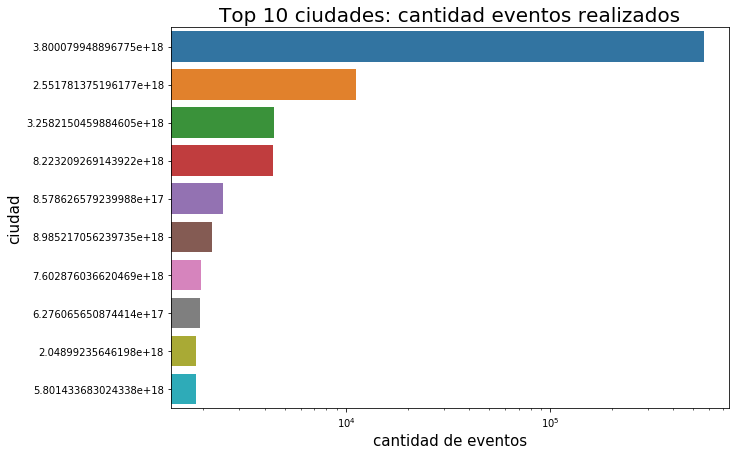

In [11]:
top_city = events['device_city'].value_counts().head(10).index
top_group_city = events.loc[events['device_city'].isin(top_city)]

plt.figure(figsize=(10, 7))
graph_city = sns.countplot(y="device_city", data=top_group_city, log=True, order=top_city)
graph_city.set_title("Top 10 ciudades: cantidad eventos realizados", size=20)
graph_city.set_ylabel("ciudad", size=15)
graph_city.set_xlabel("cantidad de eventos", size=15)

plt.savefig('top10_city.png')

# *Top 5 applicaciones en la ciudad con más eventos*

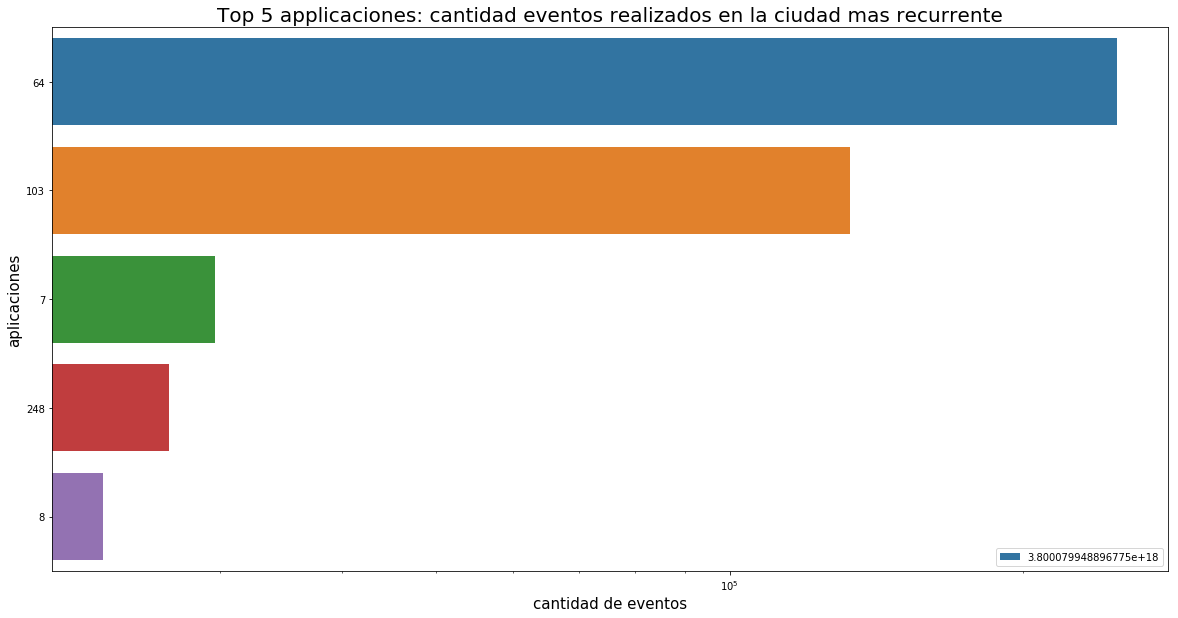

In [118]:
top_city = events['device_city'].value_counts().head(1).index
events_city = events.loc[events['device_city'].isin(top_city), ['application_id']].reset_index()
top_city_app = events_city['application_id'].value_counts().head(5).index
events_city_app = events_city.loc [events_city['application_id'].isin(top_city_app)]

plt.figure(figsize=(20,10))
graph_city_app_events = sns.countplot(y='application_id', data = events_city_app, log=True, order=top_city_app)
graph_city_app_events.set_title("Top 5 applicaciones: cantidad eventos realizados en la ciudad mas recurrente", size=20)
graph_city_app_events.set_xlabel("cantidad de eventos", size=15)
graph_city_app_events.set_ylabel("aplicaciones", size=15)
plt.legend(labels=top_city, loc="best")

plt.savefig('top5apps_city.png')

# *Cantidad de eventos atribuidos a jammp por ref_type*

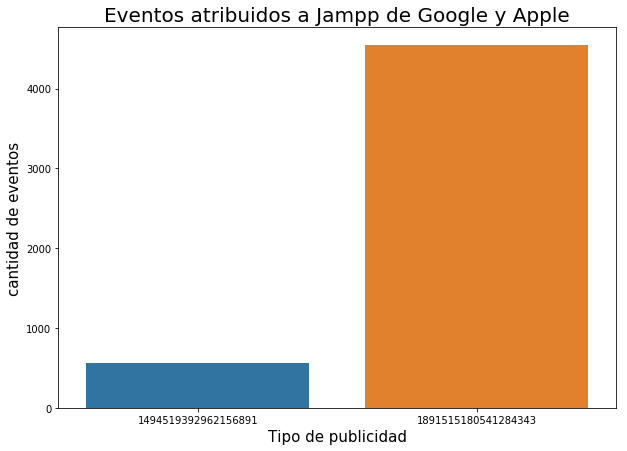

In [18]:
events_atributed_ref_type = events.loc[events['attributed'] == True, ['ref_type']]

plt.figure(figsize = (10,7))
graph_attributed_events = sns.countplot(x = events_atributed_ref_type['ref_type'], data = events_atributed_ref_type)
graph_attributed_events.set_title("Eventos atribuidos a Jampp de Google y Apple", size=20)
graph_attributed_events.set_ylabel("cantidad de eventos", size=15)
graph_attributed_events.set_xlabel("Tipo de publicidad", size=15)

plt.savefig('attributed_ref_type')

# *Cantidad de eventos por hora*

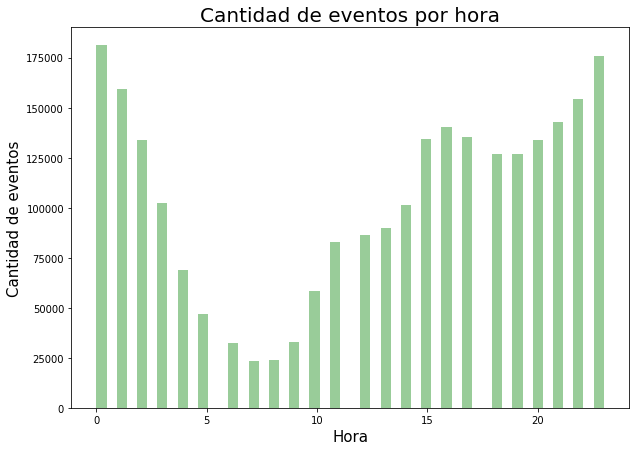

In [64]:
event_for_hour = events.loc[:, ['hour', 'event_id']]

plt.figure(figsize=(10,7))
graph = sns.distplot (event_for_hour['hour'], kde=False, rug=False, label ="Cantidad de eventos por hora",\
                      hist_kws={"color":"g"})
graph.set_title("Cantidad de eventos por hora", size=20)
graph.set_ylabel("Cantidad de eventos", size=15)
graph.set_xlabel("Hora", size=15)

plt.savefig('cantidad_eventos_por_hora.png')

# *Top app: cantidad de eventos por día*

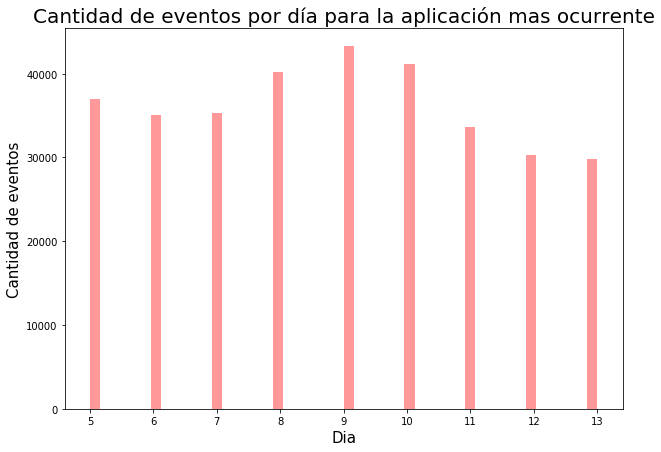

In [63]:
top_apps = events['application_id'].value_counts().head(1).index
events_app = events.loc[events['application_id'].isin(top_apps), ['day', 'application_id']]

plt.figure(figsize=(10,7))
graph = sns.distplot (events_app['day'], kde=False, rug=False, label ="Cantidad de eventos por día para app mas usada",\
                      hist_kws={"color":"r"})
graph.set_title("Cantidad de eventos por día para la aplicación mas ocurrente", size=20)
graph.set_ylabel("Cantidad de eventos", size=15)
graph.set_xlabel("Dia", size=15)

plt.savefig('topapp_eventos_por_día.png')

# *Eventos por día y hora*

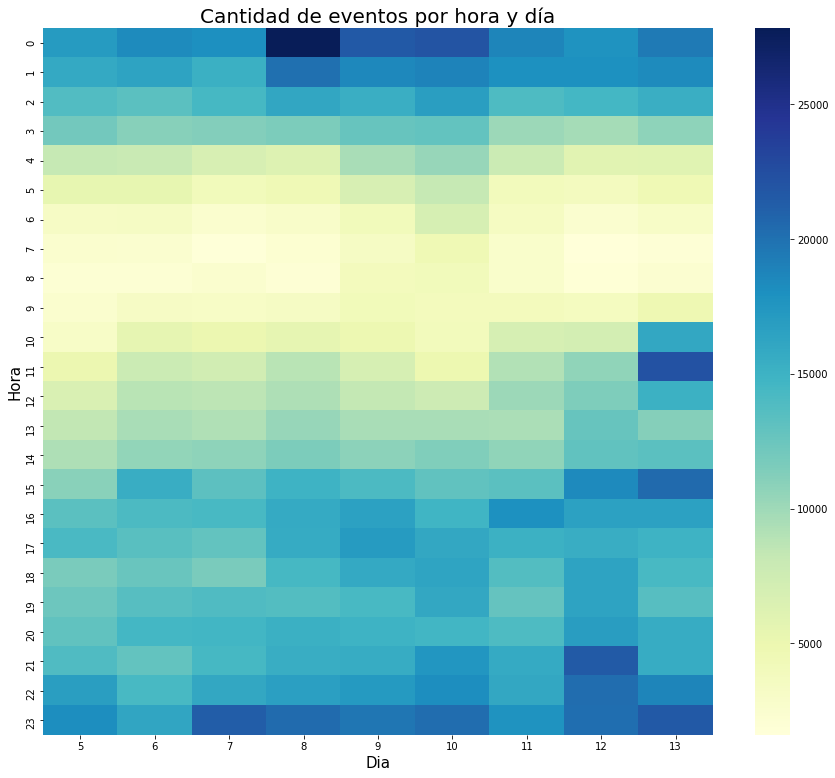

In [31]:
events_week_hour = events.loc[:,['hour', 'day']]
events_week_hour.insert(loc=2, column='cant_events', value=1)
events_week_hour = events_week_hour.pivot_table(index='hour', columns='day', values='cant_events', fill_value=0, aggfunc=np.sum)

plt.figure(figsize=(15,13))
graph = sns.heatmap(events_week_hour, cmap="YlGnBu")
graph.set_title("Cantidad de eventos por hora y día", size=20)
graph.set_ylabel("Hora", size=15)
graph.set_xlabel("Dia", size=15)

plt.savefig('cantidad_eventos_por_hora_y_dia.png')

# *Cantidad de eventos atribuidos a Jammp*

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


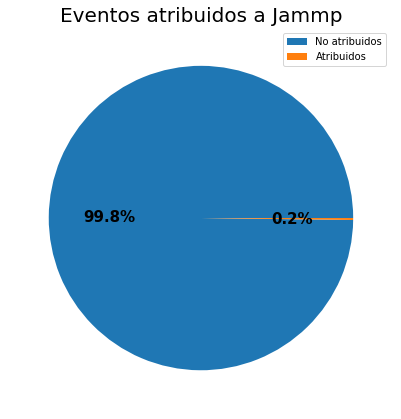

In [9]:
attributed_events = events['attributed'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
patches, texts, floatt = plt.pie(attributed_events, autopct='%1.1f%%')
ax.set_title("Eventos atribuidos a Jammp", size=20)
plt.legend(patches, labels=['No atribuidos', 'Atribuidos'], loc="best")
plt.setp(floatt, size=15, weight="bold")

plt.savefig('eventos_atribuidos')

# *Dispositivo mas ocurrente por hora*

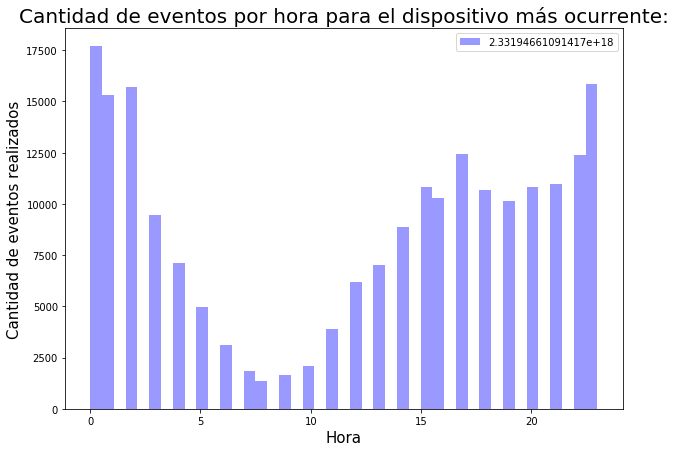

In [62]:
top_device_model = events['device_model'].value_counts().head(1).index
events_model = events.loc[events['device_model'].isin(top_device_model), ['hour']]

plt.figure(figsize=(10,7))
graph = sns.distplot (events_model['hour'], kde=False, rug=False, label = " histograma para dispositivo mas ocurrente",\
                      hist_kws={"color":"b"})
graph.set_title("Cantidad de eventos por hora para el dispositivo más ocurrente:", size=20)
graph.set_ylabel("Cantidad de eventos realizados", size=15)
graph.set_xlabel("Hora", size=15)
plt.legend(labels=top_device_model, loc="best")

plt.savefig("top_device_por_hora.png")

# *Top 5 apps: eventos por hora*

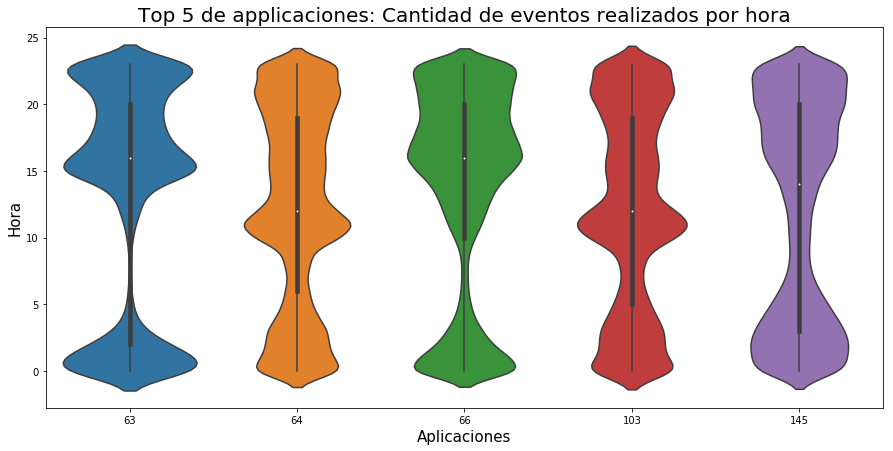

In [61]:
top_apps = events['application_id'].value_counts().head(5).index
events_apps = events.loc[events['application_id'].isin(top_apps), ['application_id', 'hour']]

plt.figure(figsize=(15,7))
graph = sns.violinplot (y=events_apps['hour'], x=events_apps['application_id'], data=events_apps)
graph.set_title("Top 5 de applicaciones: Cantidad de eventos realizados por hora", size=20)
graph.set_ylabel("Hora", size=15)
graph.set_xlabel("Aplicaciones", size=15)

plt.savefig("top5apps_eventos_por_hora")

# * Top 5 apps: eventos por hora dividido por wifi*

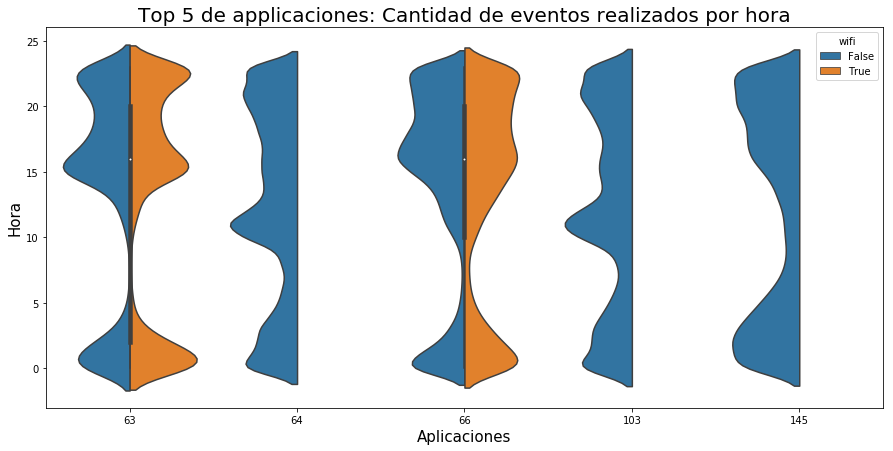

In [72]:
top_apps = events['application_id'].value_counts().head(5).index
events_apps = events.loc[events['application_id'].isin(top_apps), ['application_id', 'hour', 'wifi']]

plt.figure(figsize=(15,7))
graph = sns.violinplot (y='hour', x='application_id', hue='wifi', data=events_apps, split=True)
graph.set_title("Top 5 de applicaciones: Cantidad de eventos realizados por hora", size=20)
graph.set_ylabel("Hora", size=15)
graph.set_xlabel("Aplicaciones", size=15)

plt.savefig("top5apps_wifi")

# *Top 20 aplicaciones mas usadas*

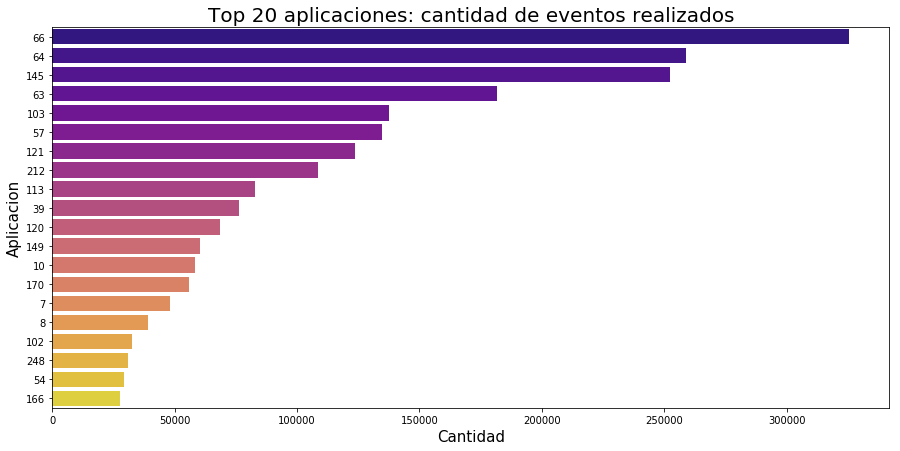

In [12]:
top_apps = events['application_id'].value_counts().head(20).index
event_apps = events.loc[events['application_id'].isin(top_apps), ['application_id']]

plt.figure(figsize=(15, 7))
g = sns.countplot(y="application_id", data=event_apps, palette="plasma", order=top_apps)
g.set_title("Top 20 aplicaciones: cantidad de eventos realizados", fontsize =20)
g.set_ylabel("Aplicacion", fontsize = 15)
g.set_xlabel("Cantidad", fontsize = 15)

plt.savefig("top10apps_cantidad_eventos.png")

# *top 5 event id*

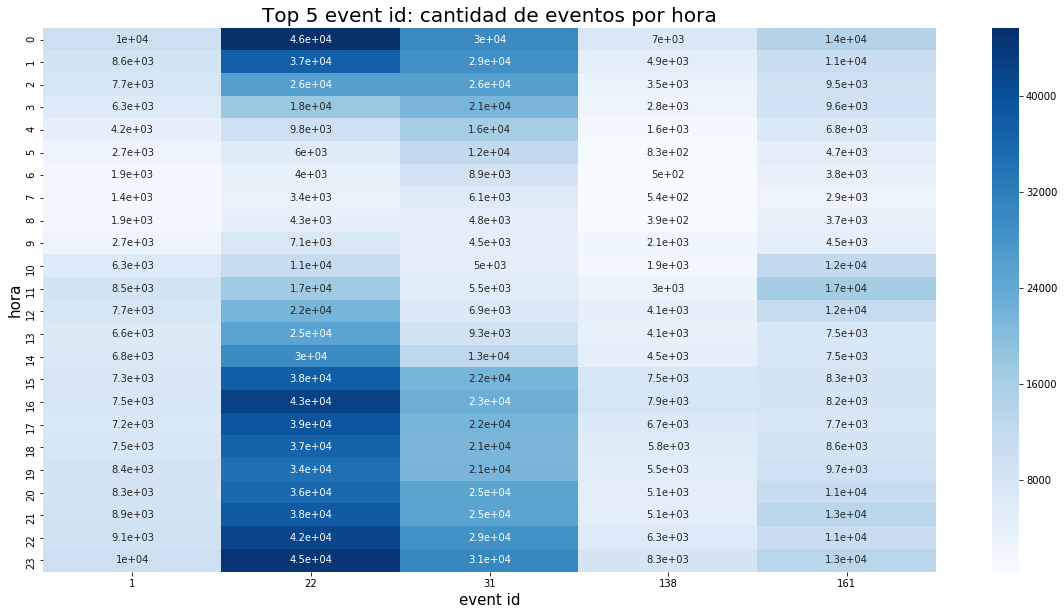

In [75]:
top5_event_id = events['event_id'].value_counts().head(5).index
top5_group = events.loc[events['event_id'].isin(top5_event_id), ['event_id', 'hour']]
event_id_hour = top5_group.groupby(['event_id', 'hour']).size().unstack()
event_id_hour = event_id_hour.fillna(0).T

plt.figure(figsize=(20, 10))
heap_map = sns.heatmap(event_id_hour, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("Top 5 event id: cantidad de eventos por hora", fontsize=20)
heap_map.set_xlabel("event id", fontsize=15)
heap_map.set_ylabel("hora", fontsize=15)

plt.savefig("top5_event_id", bbox_inches = 'tight', pad_inches = 0.1)

# *Top 5 kind*

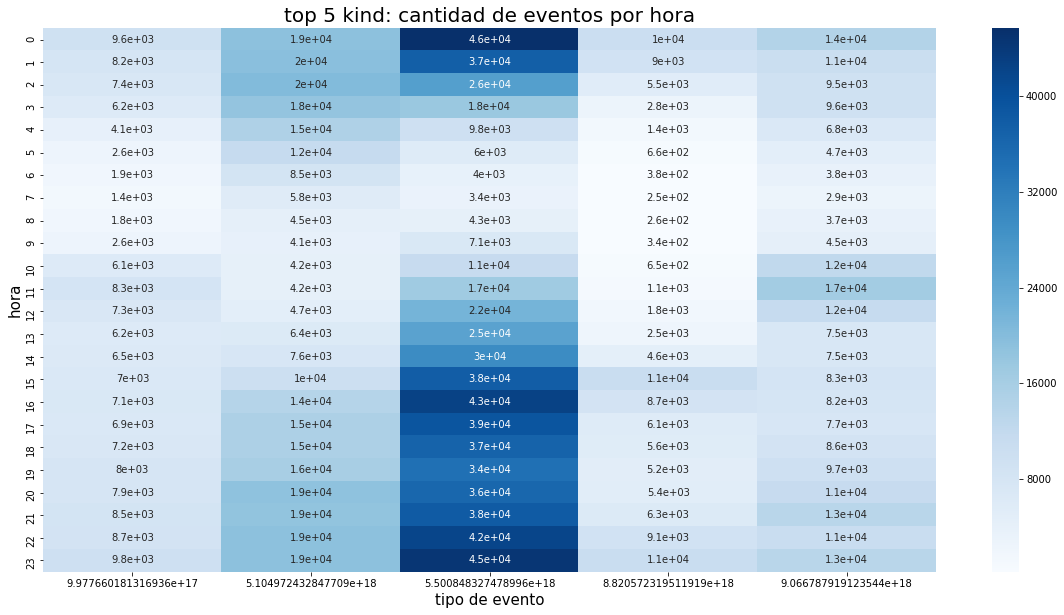

In [74]:
top5_kind = events['kind'].value_counts().head(5).index
top5_group = events.loc[events['kind'].isin(top5_kind)]
kind_hour = top5_group.groupby(['kind', 'hour']).size().unstack()
kind_hour = kind_hour.fillna(0).T

plt.figure(figsize=(20, 10))
heap_map = sns.heatmap(kind_hour, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("top 5 kind: cantidad de eventos por hora", fontsize=20)
heap_map.set_xlabel("tipo de evento", fontsize=15)
heap_map.set_ylabel("hora", fontsize=15)
plt.savefig("top5_kind", bbox_inches = 'tight', pad_inches = 0.1)

# *top 5 app: eventos por día*

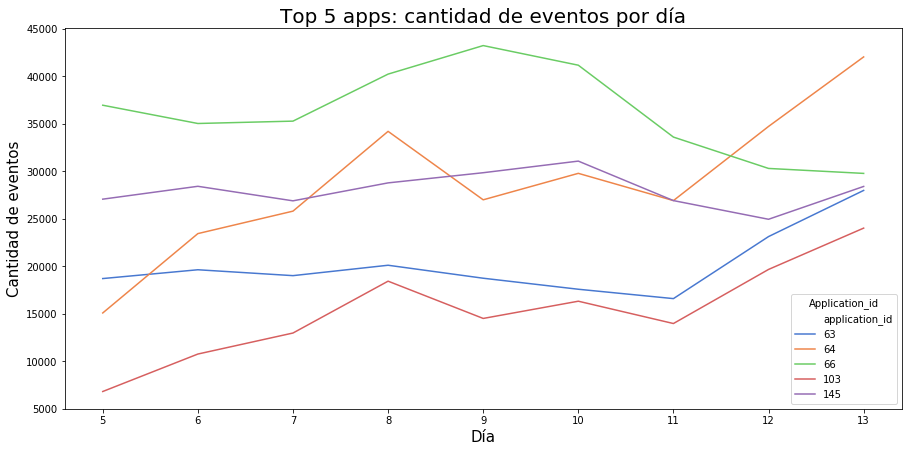

In [13]:
top5_app = events['application_id'].value_counts().head(5).index
top5_group = events.loc[events['application_id'].isin(top5_app), ['application_id', 'day']]
top5_group.insert(loc=2, column='cant', value=1)
top5_group = top5_group.groupby(['application_id', 'day']).agg('count').reset_index()
 
plt.figure(figsize=(15,7))
graph = sns.lineplot(x=top5_group['day'], y=top5_group['cant'], hue=top5_group['application_id'],\
                     data=top5_group, palette=sns.color_palette('muted', n_colors=5))
graph.set_title("Top 5 apps: cantidad de eventos por día",size=20)
graph.set_ylabel('Cantidad de eventos',size=15)
graph.set_xlabel('Día',size=15)
plt.legend(title='Application_id')

plt.savefig("top5apps_eventos_por_dia", bbox_inches = 'tight', pad_inches = 0.1)

# *Eventos por tipo de conexion*

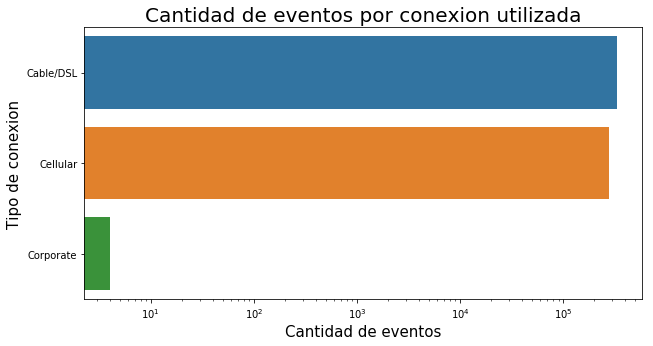

In [14]:
plt.figure(figsize=(10, 5))
graph = sns.countplot(y="connection_type", data=events, log=True)
graph.set_title("Cantidad de eventos por conexion utilizada",size=20)
graph.set_xlabel('Cantidad de eventos',size=15)
graph.set_ylabel('Tipo de conexion',size=15)
plt.savefig('eventos_por_conexion.png')

# *Top 10 usuarios*

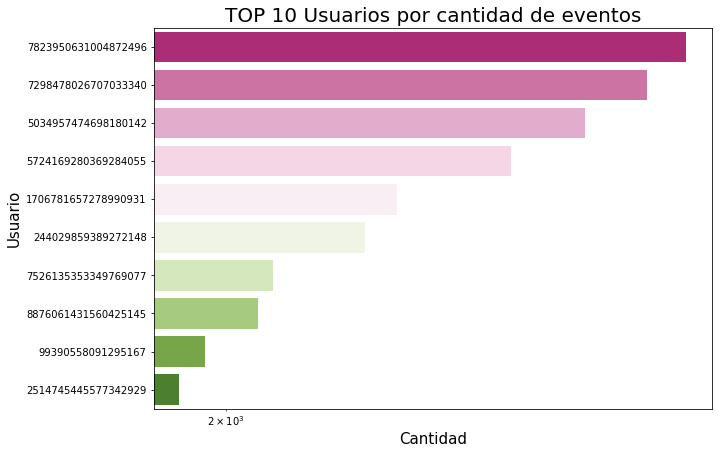

In [81]:
top_usuarios = events['ref_hash'].value_counts().head(10).index
top_group = events.loc[events['ref_hash'].isin(top_usuarios), ['ref_hash']]

plt.figure(figsize=(10, 7))
ref_hash_g = sns.countplot(y=top_group['ref_hash'], data=top_group, palette='PiYG', log=True,\
                              order=top_usuarios)
ref_hash_g.set_title("TOP 10 Usuarios por cantidad de eventos", fontsize =20)
ref_hash_g.set_xlabel('Cantidad', fontsize = 15)
ref_hash_g.set_ylabel("Usuario", fontsize = 15)

plt.savefig('eventos_por_usuario.png')

# *Top 10 usuarios por wifi*

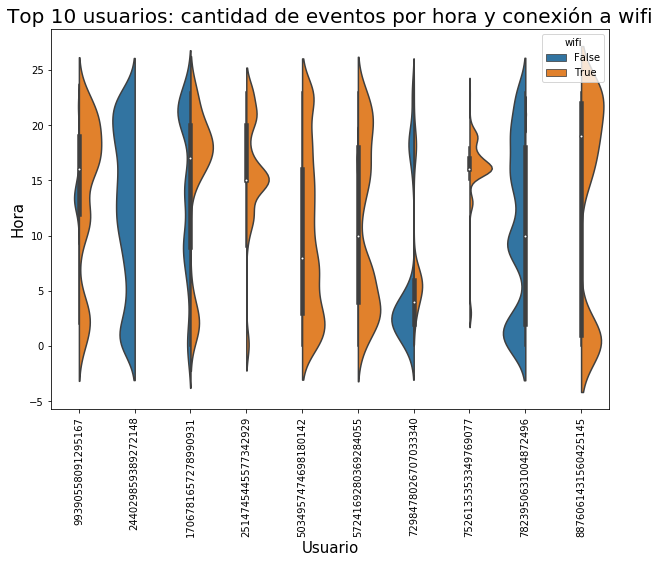

In [15]:
top_usuarios = events['ref_hash'].value_counts().head(10).index
top_group = events.loc[events['ref_hash'].isin(top_usuarios), ['ref_hash', 'wifi', 'hour']]

plt.figure(figsize=(10,7))
usuarios_wifi_events_g = sns.violinplot(x='ref_hash', y='hour', hue='wifi', data=top_group, \
                                        split=True, scale="count")
usuarios_wifi_events_g.set_xticklabels(usuarios_wifi_events_g.get_xticklabels(), rotation=90)
usuarios_wifi_events_g.set_title("Top 10 usuarios: cantidad de eventos por hora y conexión a wifi",size=20)
usuarios_wifi_events_g.set_ylabel('Hora',size=15)
usuarios_wifi_events_g.set_xlabel('Usuario',size=15)
plt.savefig('eventos_por_usuario_wifi.png')

# *Top 10 device language*

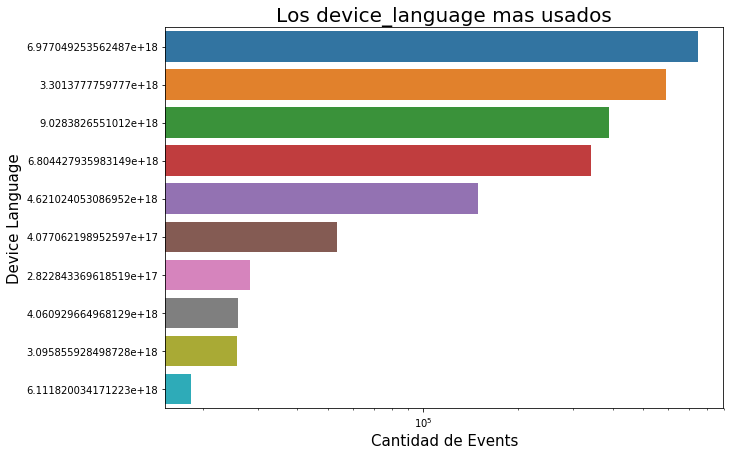

In [84]:
top_language = events['device_language'].value_counts().head(10).index
top_group_language = events.loc[events['device_language'].isin(top_language)]

plt.figure(figsize=(10, 7))
g1 =sns.countplot(y="device_language", data=top_group_language, log=True, order=top_language)
g1.set_title("Los device_language mas usados", fontsize =20)
g1.set_xlabel("Cantidad de Events", fontsize = 15)
g1.set_ylabel("Device Language", fontsize = 15)

plt.savefig('top10_languages.png')